In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [12]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [13]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [14]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.6465 - loss: 0.6173 - val_accuracy: 0.8436 - val_loss: 0.3698
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.8883 - loss: 0.2878 - val_accuracy: 0.8728 - val_loss: 0.3198
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9185 - loss: 0.2174 - val_accuracy: 0.8676 - val_loss: 0.3211


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8627 - loss: 0.3372
Test Accuracy: 0.86


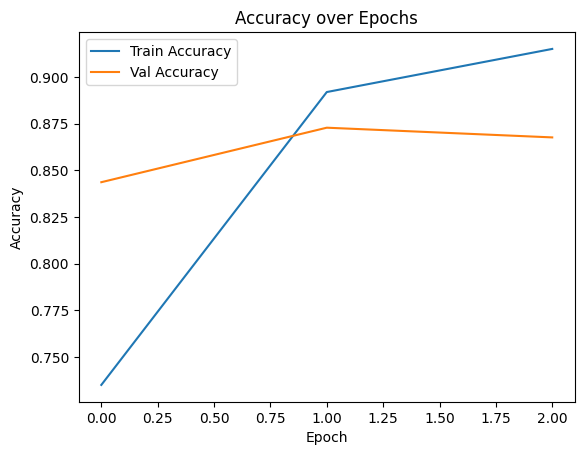

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

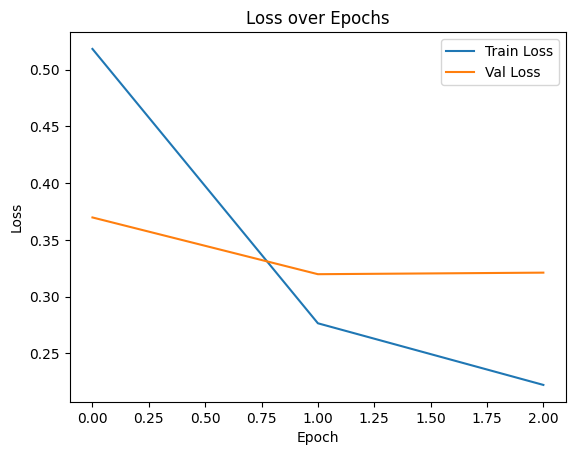

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()